<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/main/CodeExamples/ARMA/testingARMA_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import pandas as pd
import numpy as np
import pylab as pl

import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
%pylab inline




Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.11/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['mod']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [155]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")


# testing ARMA and ARIMA with synthetic signal

In [156]:
x = np.arange(100)
df = pd.DataFrame({"time":x, "y":np.random.randn(100) })
df

,time,y
0,0,-1.320932
1,1,0.623319
2,2,0.105972
3,3,0.475838
4,4,2.393592
...,...,...
95,95,-0.118274
96,96,0.528401
97,97,0.090953
98,98,2.030406


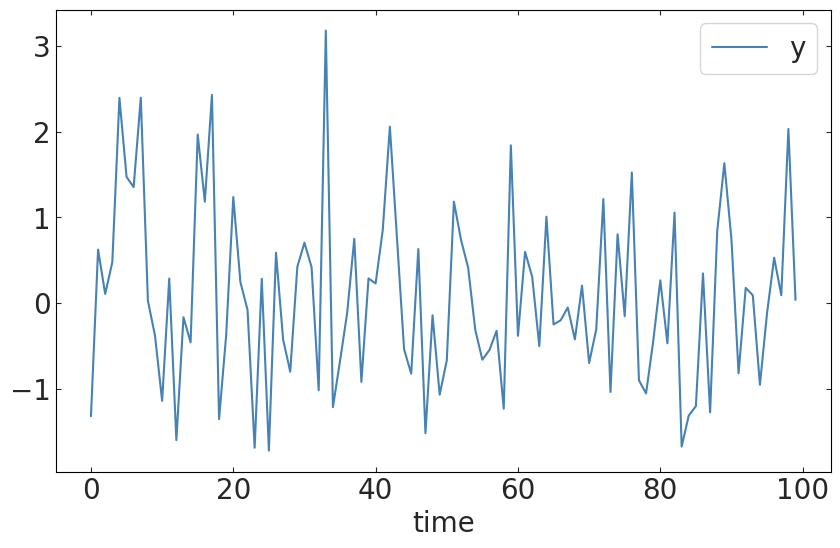

In [157]:
df.plot(x="time", y="y");

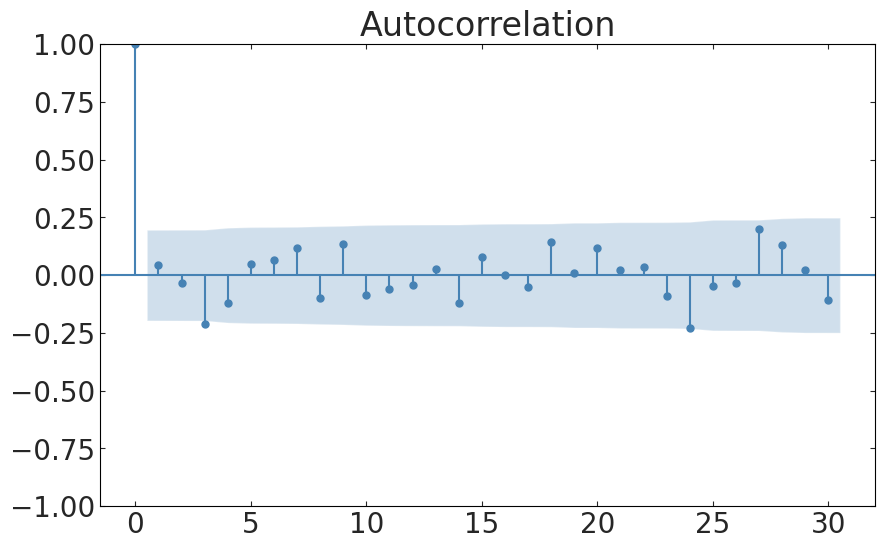

In [74]:
sm.graphics.tsa.plot_acf(df["y"], lags=30);

# Test for stationarity

In [158]:
sm.tsa.stattools.adfuller?
#The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root

In time series analysis, a "unit root test" is a statistical test used to determine whether a time series is stationary, meaning its statistical properties (like mean and variance) remain constant over time, while "stationarity" refers to the state of a time series where its statistical properties do not change with time; essentially, a unit root test checks if a time series has a "unit root," which indicates non-stationarity, making it difficult to analyze and forecast with traditional methods.

# if there is a unit test, the process is NOT stationary

how to read the result

adf : float
    The test statistic: the thing we measured

**pvalue : float**
    MacKinnon's approximate p-value based on MacKinnon (1994, 2010).


In [166]:
x = np.arange(100)
df = pd.DataFrame({"time":x, "y":np.random.randn(100) + # a random noise component
                   np.sin(x*np.pi*0.1)*2 + np.sin(x*np.pi*0.01)*2 # some cyclic components
                   + x * 0.05 + 2 * np.random.randn(100)*0.2 # some stickastic linear trend
                  })

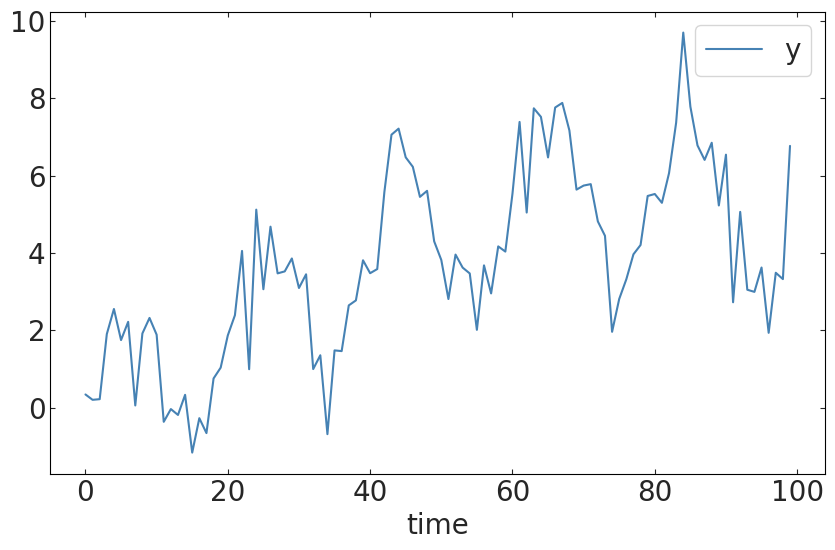

In [167]:
df.plot(x="time", y="y");

In [168]:
significance_threshold = 0.05

unittest = sm.tsa.stattools.adfuller(df["y"])

print(f"statistics value: {unittest[0]}")
print(f"p-value: {unittest[1]}")
print(f"is p-value < {significance_threshold}? {unittest[1]<significance_threshold}")
print(f"\nis there a unit test? {unittest[1]>=significance_threshold}")
print(f"\nis it stationary? {unittest[1]<significance_threshold}")


statistics value: -1.7007334481648424
p-value: 0.4307346219828412
is p-value < 0.05? False

is there a unit test? True

is it stationary? False


Hypothesis: there is a unit test, i.e. its not stationary

p-value < threshold => there is a probability < threshold that _if there were a unit root_ the result would give a number as low as this one

p-value < threshold => there is a **not significant** probability that this process is stationary (where we defined the significance with our threshold)

<Axes: xlabel='time'>

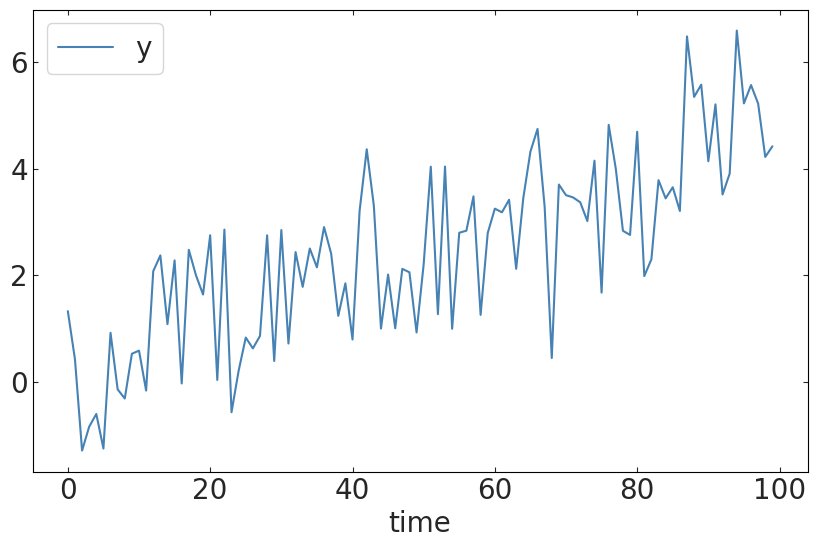

In [79]:
df = pd.DataFrame({"time":x, "y":np.random.randn(100) + # a random noise component
                   + x * 0.05 + 2 * np.random.randn(100)*0.2 # some stickastic linear trend
                  })
df.plot(x="time", y="y")

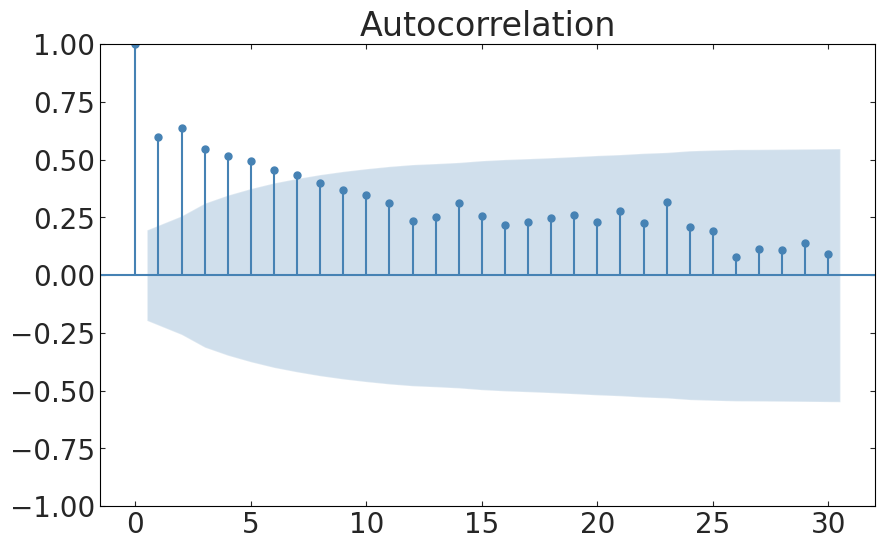

In [80]:
sm.graphics.tsa.plot_acf(df["y"], lags=30);

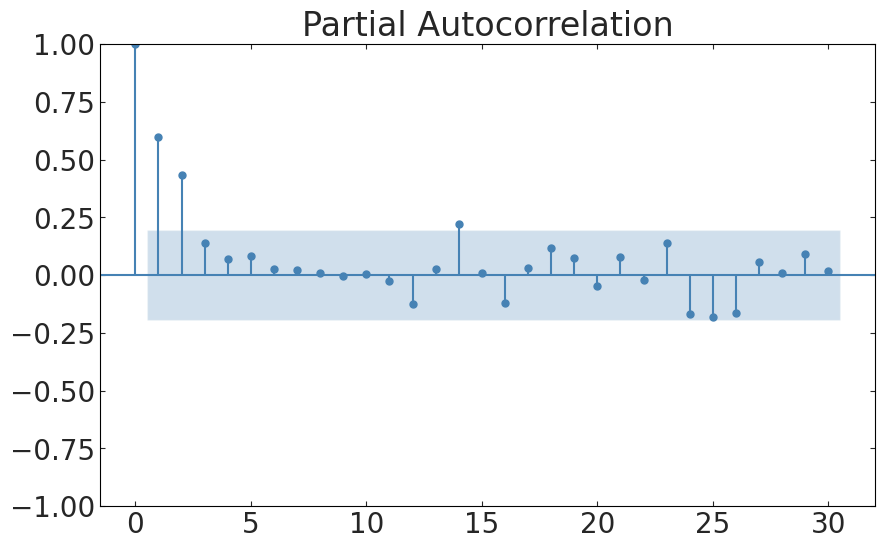

In [81]:
sm.graphics.tsa.plot_pacf(df["y"], lags=30);

In [82]:

unittest = sm.tsa.stattools.adfuller(df["y"])
print(f"statistics value: {unittest[0]}")
print(f"p-value: {unittest[1]}")
print(f"is p-value < {significance_threshold}?, {unittest[1]<significance_threshold}")
print(f"\nis there a unit test? {unittest[1]>=significance_threshold}")
print(f"\nis it stationary? {unittest[1]<significance_threshold}")

statistics value: -1.7725774604839097
p-value: 0.39415867768604634
is p-value < 0.05?, False

is there a unit test? True

is it stationary? False


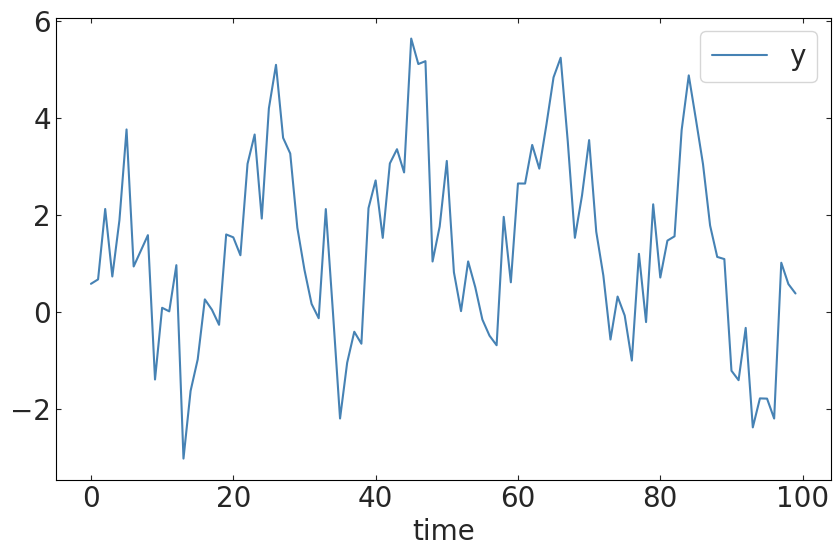

In [83]:
df = pd.DataFrame({"time":x, "y":np.random.randn(100) + # a random noise component
                   np.sin(x*np.pi*0.1)*2 + np.sin(x*np.pi*0.01)*2 # some cyclic components
                  })
df.plot(x="time", y="y");

In [84]:
unittest = sm.tsa.stattools.adfuller(df["y"])
print(f"statistics value: {unittest[0]}")
print(f"p-value: {unittest[1]}")
print(f"is p-value < {significance_threshold}?, {unittest[1]<significance_threshold}")
print(f"\nis there a unit test? {unittest[1]>=significance_threshold}")
print(f"\nis it stationary? {unittest[1]<significance_threshold}")

statistics value: -2.2440999059707183
p-value: 0.1906306427179849
is p-value < 0.05?, False

is there a unit test? True

is it stationary? False


In [85]:
unittest

(-2.2440999059707183,
 0.1906306427179849,
 12,
 87,
 {'1%': -3.5078527246648834,
  '5%': -2.895382030636155,
  '10%': -2.584823877658872},
 289.7243891978269)

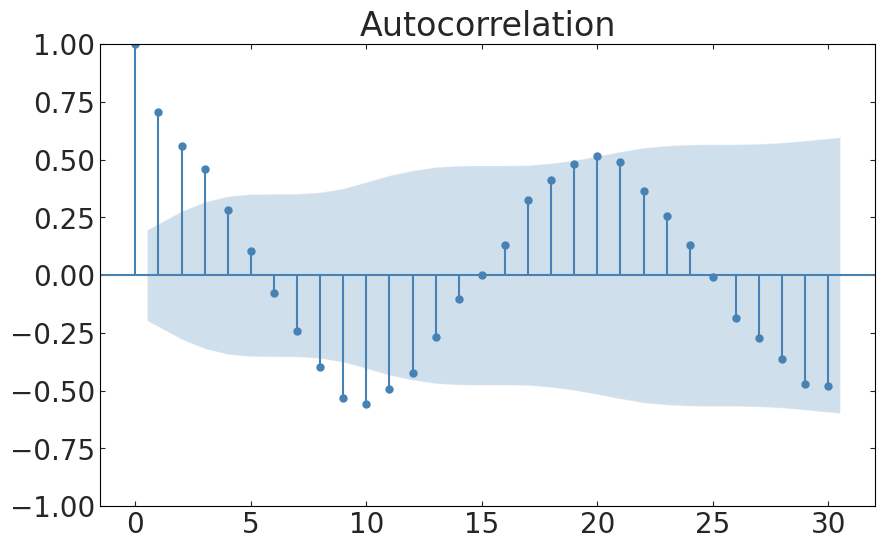

In [86]:
sm.graphics.tsa.plot_acf(df["y"], lags=30);

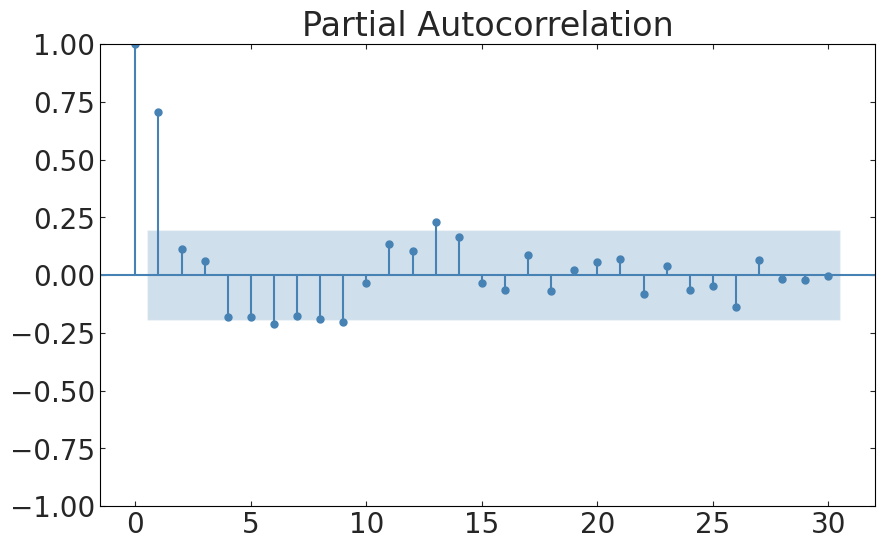

In [87]:
sm.graphics.tsa.plot_pacf(df["y"], lags=30);

In [110]:
p = 3
q = 5
arma_model = sm.tsa.ARIMA(df["y"][:-10], order=(p,0, q))
model_fit = arma_model.fit()
model_fit.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   90
Model:                 ARIMA(3, 0, 5)   Log Likelihood                -136.733
Date:                Thu, 27 Feb 2025   AIC                            293.466
Time:                        18:03:29   BIC                            318.464
Sample:                             0   HQIC                           303.547
                                 - 90                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4788      0.198      7.486      0.000       1.092       1.866
ar.L1          0.9752      0.131      7.467      0.000       0.719       1.231
ar.L2          0.7352      0.244      3.019      0.003       0.258       1.212
ar.L3         -0.9019      0.128     -7.065      0.000      -1.152      -0.652
ma.L1         -0.7288   4143.120     -0.000      1.000   -8121.094    8119.636
ma.L2         -1.0058    136.945     -0.007      0.994    -269.412     267.401
ma.L3          0.9525   4783.763      0.000      1.000   -9375.051    9376.956
ma.L4          0.1697    505.467      0.000      1.000    -990.528     990.867
ma.L5         -0.0619    277.815     -0.000      1.000    -544.569     544.445
sigma2         1.1012   4943.219      0.000      1.000   -9687.429    9689.632
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.39
Prob(Q):                              0.94   Prob(JB):                         0.18
Heteroskedasticity (H):               0.66   Skew:                            -0.40
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

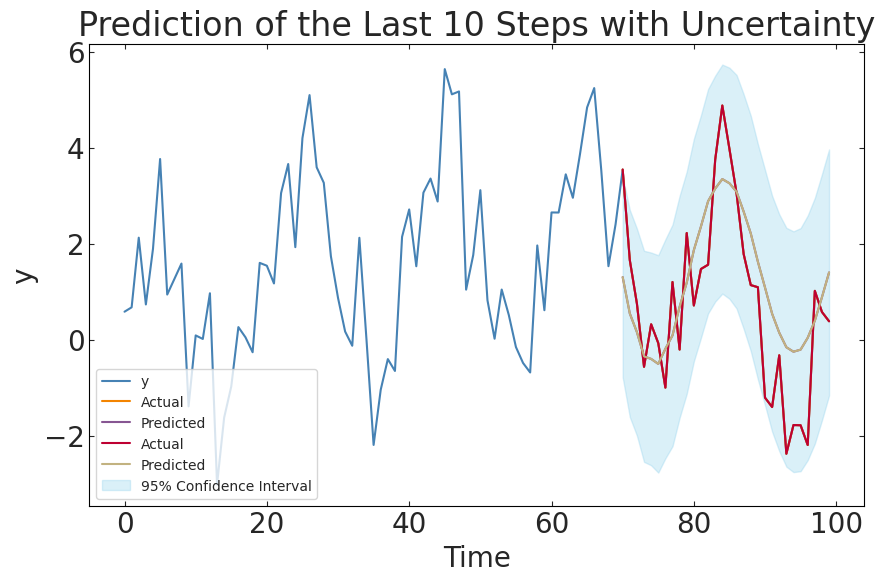

In [117]:
last_N_steps = df.iloc[-30:]

# Predict the last 10 steps using the fitted model
predictions = model_fit.get_forecast(steps=30)

# Extract predicted mean and confidence intervals
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Plot the predictions with uncertainty
ax = df.plot(x="time", y="y")

ax.plot(last_10_steps["time"], last_N_steps["y"], label="Actual")
ax.plot(last_10_steps["time"], predicted_mean.values, label="Predicted")
ax.plot(last_10_steps["time"], last_N_steps["y"], label="Actual")
ax.plot(last_10_steps["time"], predicted_mean.values, label="Predicted")
ax.fill_between(last_N_steps["time"], confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], alpha=0.3, color="skyblue",
                 label="95% Confidence Interval")
ax.set_xlabel("Time")
ax.set_ylabel("y")
ax.set_title("Prediction of the Last 10 Steps with Uncertainty")
plt.legend(fontsize=10)
plt.show()

In [118]:

arima_model = sm.tsa.ARIMA(df["y"], order=(p,1,q))
arima_model.fit()
model_fit = arima_model.fit()
model_fit.summary()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(3, 1, 5)   Log Likelihood                -156.740
Date:                Thu, 27 Feb 2025   AIC                            331.480
Time:                        18:09:46   BIC                            354.836
Sample:                             0   HQIC                           340.930
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8355      5.393      0.155      0.877      -9.735      11.406
ar.L2          0.8877      9.876      0.090      0.928     -18.468      20.244
ar.L3         -0.9465      5.084     -0.186      0.852     -10.910       9.017
ma.L1         -1.5034     17.843     -0.084      0.933     -36.475      33.468
ma.L2         -0.4142     44.659     -0.009      0.993     -87.944      87.116
ma.L3          1.7302     37.258      0.046      0.963     -71.293      74.754
ma.L4         -0.5791      6.353     -0.091      0.927     -13.031      11.873
ma.L5         -0.2203      3.976     -0.055      0.956      -8.013       7.573
sigma2         1.2903     16.167      0.080      0.936     -30.397      32.978
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.72   Prob(JB):                         0.55
Heteroskedasticity (H):               0.76   Skew:                            -0.07
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

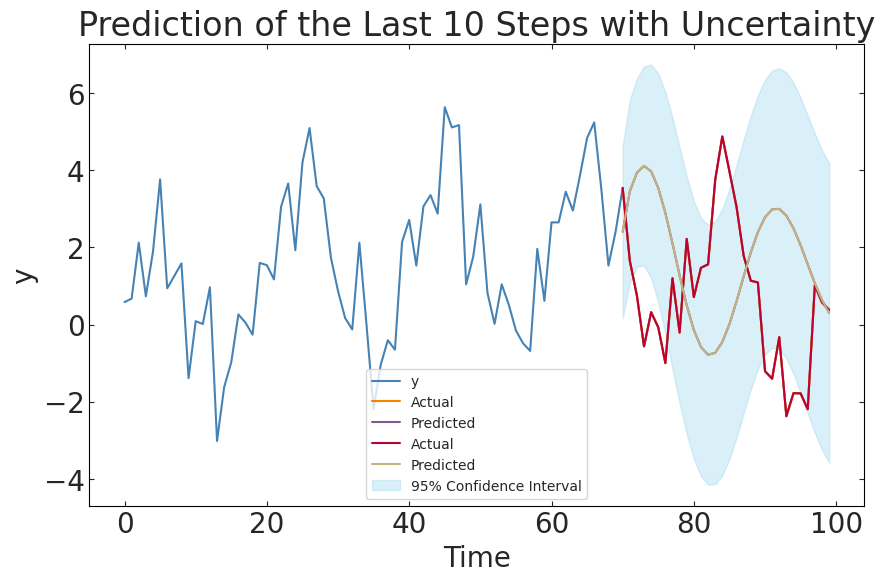

In [138]:
last_N_steps = df.iloc[-30:]

# Predict the last 10 steps using the fitted model
predictions = model_fit.get_forecast(steps=30)

# Extract predicted mean and confidence intervals
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Plot the predictions with uncertainty
ax = df.plot(x="time", y="y")

ax.plot(last_10_steps["time"], last_N_steps["y"], label="Actual")
ax.plot(last_10_steps["time"], predicted_mean.values, label="Predicted")
ax.plot(last_10_steps["time"], last_N_steps["y"], label="Actual")
ax.plot(last_10_steps["time"], predicted_mean.values, label="Predicted")
ax.fill_between(last_N_steps["time"], confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], alpha=0.3, color="skyblue",
                 label="95% Confidence Interval")
ax.set_xlabel("Time")
ax.set_ylabel("y")
ax.set_title("Prediction of the Last 10 Steps with Uncertainty")
plt.legend(fontsize=10)
plt.show()

In [148]:
pmax, i, qmax = 5, 5, 5
aics = np.zeros((pmax,i, qmax))
for p in range(pmax):
        for q in range(qmax):
            try:
                mod = sm.tsa.ARIMA(df["y"], order=(p,i,q)).fit()
                aics[p][q] = mod.aic
            except:
                aics[p][q] = np.nan

pbest,ibest, qbest = np.where(aics == np.nanmin(aics))
print("best parameters: p: {:d} p,q: {:d}".format(pbest[0], ibest[0], qbest[0]))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: Conve

best parameters: p: 0 p,q: 4


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [149]:
np.where(aics == np.nanmin(aics))

(array([0, 0, 0, 0, 0]), array([4, 4, 4, 4, 4]), array([0, 1, 2, 3, 4]))

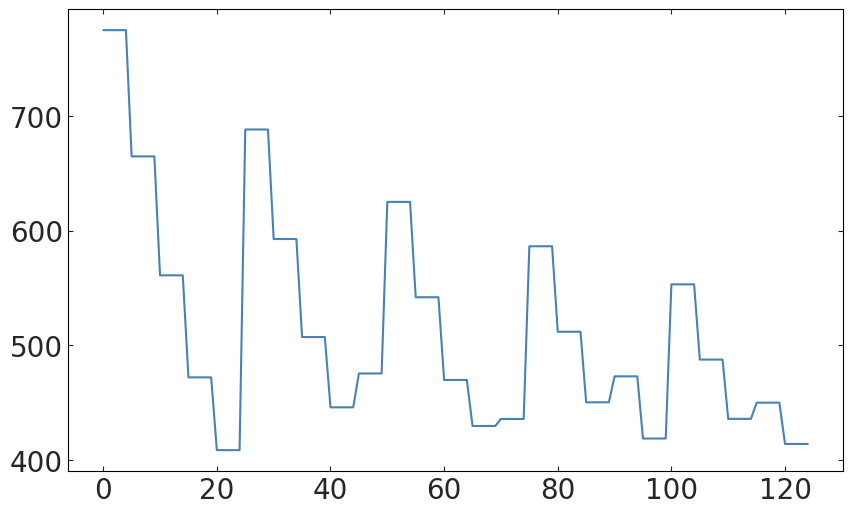

In [150]:
pl.plot(aics.flatten())

In [151]:
mod = sm.tsa.ARIMA(df["y"], order=(pbest[0],1,qbest[0]))
bestmod = mod.fit()


In [152]:
bestmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -178.806
Date:                Thu, 27 Feb 2025   AIC                            359.612
Time:                        18:15:34   BIC                            362.207
Sample:                             0   HQIC                           360.662
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.1692      0.310      7.001      0.000       1.562       2.776
===================================================================================
Ljung-Box (L1) (Q):                   6.12   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.01   Prob(JB):                         0.62
Heteroskedasticity (H):               0.84   Skew:                            -0.24
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

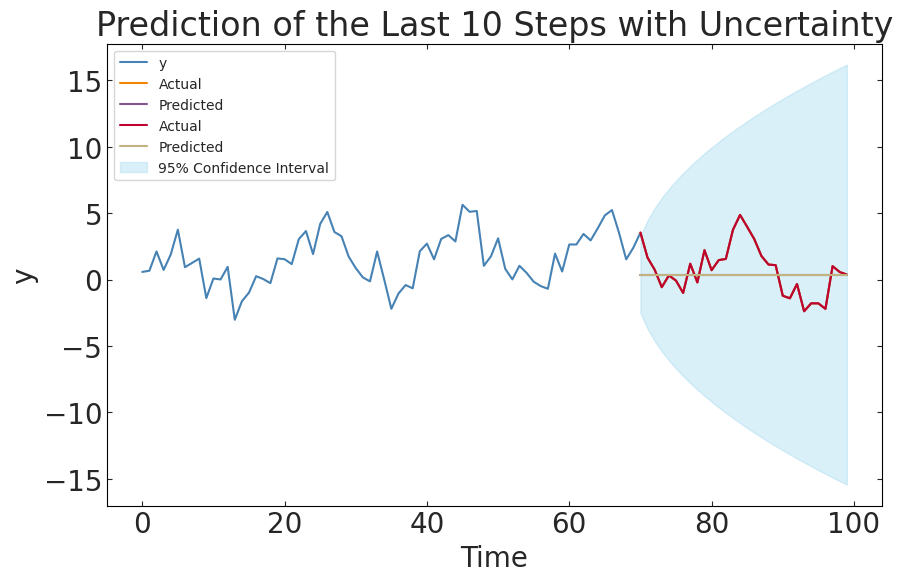

In [153]:
last_N_steps = df.iloc[-30:]

# Predict the last 10 steps using the fitted model
predictions = bestmod.get_forecast(steps=30)

# Extract predicted mean and confidence intervals
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Plot the predictions with uncertainty
ax = df.plot(x="time", y="y")

ax.plot(last_10_steps["time"], last_N_steps["y"], label="Actual")
ax.plot(last_10_steps["time"], predicted_mean.values, label="Predicted")
ax.plot(last_10_steps["time"], last_N_steps["y"], label="Actual")
ax.plot(last_10_steps["time"], predicted_mean.values, label="Predicted")
ax.fill_between(last_N_steps["time"], confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], alpha=0.3, color="skyblue",
                 label="95% Confidence Interval")
ax.set_xlabel("Time")
ax.set_ylabel("y")
ax.set_title("Prediction of the Last 10 Steps with Uncertainty")
plt.legend(fontsize=10)
plt.show()